## LEAD SCORING CASE STUDY (TEAM 9 SEPT 2022 MODULE EXAM)

### PROBLEM STATEMENT

    An education company named X Education sells online courses to our industry professionals.
    many professionals who are interested in the courses land on their website for courses.
    
    The company is using social Media marketing on various websites and search engines like google
    once the people land on websites, they might get intrested and browse courses or fill up a 
    form for the course or watch videos.
    1. Important to know that these people are classified as leads as they fill up a form 
    providing their email address or phone number. 
    Moreover, the company also gets leads through past referrals
    2. Important to know that once the they get a lead. sales team contacts them.
    3. Important to know that Thru this process, some of the leads get converted while most do 
    not. TYPICAL LEAD CONVERSION RATE IS ABOUT 30%.
    
    X Education has now hired you!!!
    They have given you a task.
    1. SELECT THE MOST PROMISING LEADS. i.e. the leads that are most likely to convert into paying 
    customers.
    2. The company requires a model. wherein you need to assign a leadscore to each of the leads
    such that the customers with higher lead socre have a higher conversion chance and the
    customers with lower lead score havd a lower conversion chance.
    3. The CEO, in particular has given a target lead conversion rate to be around 80%.
    

### GOALS OF THE CASE STUDY

    1. Build a LOGISTIC REGRESSION MODEL to assign a lead score between 0 and 100 to each of the 
    leads which can be used by the company to target potential sales.
    2. higher the score would mean that the lead is hot.
    hot here means the lead is most likely to convert, whereas a lower score would mean that
    the lead is cold and will most likely skip.

In [1]:
#basic modules
import pandas as pd
import numpy as np
#data Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
#supress warnings
import warnings
warnings.filterwarnings('ignore')
#increase view limits
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
pd.options.display.float_format= '{:.2f}'.format

### Reading and Understanding Data

In [2]:
# importing os 
import os
os.chdir(r"C:\Users\stanl\Downloads")

In [3]:
#reading the data file using pandas.
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [4]:
# checking shape
df.shape

# 9240 rows and 37 columns

(9240, 37)

In [5]:
# checking stats for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [6]:
# checking dublicates.
df.duplicated().sum()

# No dublicate rows. duplicated function returns a bool of rows which contain False for no dublicates.

0

In [7]:
# checking all columns, their datatypes and also get idea of amount of null values
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observations : 
    1. alot of columns have alot of null values and are not so important, it is safe to drop it.
    2. Prospect ID and Lead Number both have a unique idenfier(Primary key). we can drop either 
    one of them. it is safe to drop Prospect ID.
    3. Columns names are toooooooo long.
    4. we have observed 'select' insted of 'Nan'. it means that select appears when someone does
    not select anything from the dropdown in the form provided.
    

### Data Cleaning

#### Rename column names.
    1. Long column names makes analysis a bit hard.
    2. convert into snake case (personal preference to handle data.)
    

In [8]:
# change into snake case (space to ____)

df.columns = df.columns.str.replace(' ','_').str.lower()

# checks

df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [9]:
# shorten column name

df.rename(columns=
          {'totalvisits': 'total_visits',
           'total_time_spent_on_website': 'time_on_website', 
           'how_did_you_hear_about_x_education': 'source',
           'what_is_your_current_occupation': 'occupation',
           'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
           'receive_more_updates_about_our_courses': 'courses_updates', 
           'update_me_on_supply_chain_content': 'supply_chain_content_updates',
           'get_updates_on_dm_content': 'dm_content_updates',
           'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
            'a_free_copy_of_mastering_the_interview': 'mastering_interview'},
          inplace = True)

# df.rename mein dict ka key value dalo. kush raho.
# inplace = True means it is overwriding changes to the actual data set.

# checking

df.columns.to_list()

['prospect_id',
 'lead_number',
 'lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'converted',
 'total_visits',
 'time_on_website',
 'page_views_per_visit',
 'last_activity',
 'country',
 'specialization',
 'source',
 'occupation',
 'course_selection_reason',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'courses_updates',
 'tags',
 'lead_quality',
 'supply_chain_content_updates',
 'dm_content_updates',
 'lead_profile',
 'city',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'cheque_payment',
 'mastering_interview',
 'last_notable_activity']

#### Drop prospect_id column

In [10]:
df.drop(['prospect_id'],axis=1,inplace=True)

#### Replace 'select' category with Nan or null values.


In [11]:
# select data types with object as datatype or non numeric columns
df_non_numeric=df.select_dtypes(include='object')

# find out columns who have'Select'
columns_with_select=df_non_numeric.columns[df_non_numeric.apply(lambda x : x.str.contains('Select',na=False)).any()]
columns_with_select.to_list()

['specialization', 'source', 'lead_profile', 'city']

There are 4 columns that contain 'Select', which are effectively treated as null values.
we are going to make that change.

In [12]:
#replace values
select=columns_with_select.to_list()
df[select]=df[select].replace('Select',np.nan)

#### Handle null values and columns generated by sales team / flags

1. Given are alot of columns with very high number of null entities. best is to calculate the percentage of null values in the columns and take a decision.
2. We can drop sales related columns because they seem to be data entries that are made after the sales team has contacted the student / potential lead. those have no purpose of our model i.e providing lead scores
3. The columns are identified as :
    - tages <br />
    - lead_quality <br />
    - last_activity <br />
    - last_notable_activity <br />
    - all columns which start with asymmetric name. <br />
    

In [13]:
# Percentage of null values for each column in df
(df.isnull().sum()/len(df))*100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

**Observation :** we can see that few columns with high percentage of missing data.
since, there are no ways to get data back, we can drop this columns.

#### Drop columns that have 40% more null values, sales generated flags or tags and columns named as assymetric 

In [14]:
df.drop(
    [
    'source',
    'lead_quality',
    'lead_profile',
    'asymmetrique_activity_index',
    'asymmetrique_profile_index',
    'asymmetrique_activity_score',
    'asymmetrique_profile_score',
    'last_activity',
    'last_notable_activity'
    ],axis=1,inplace=True)

df.columns

Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'country', 'specialization', 'occupation',
       'course_selection_reason', 'search', 'magazine', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'courses_updates', 'tags',
       'supply_chain_content_updates', 'dm_content_updates', 'city',
       'cheque_payment', 'mastering_interview'],
      dtype='object')

In [15]:
# we are left with few columns with nulls, rechecking
(df.isnull().sum()/len(df))*100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
d

**Observation** : we have 5 columns with high null values
- country
- specialization
- occupation
- course_selection_reason
- city

we look at them individually to see what can be done.

**Country Column**

In [16]:
df.country.value_counts(normalize=True,dropna=False)*100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

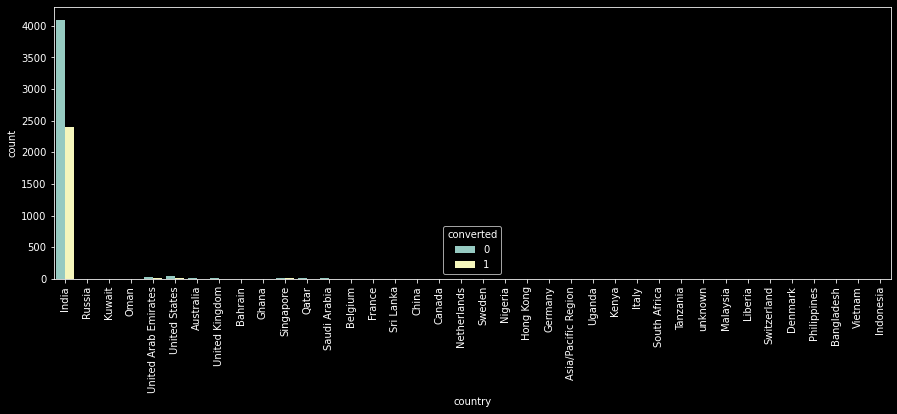

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1=sns.countplot(df.country,hue=df.converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation :** This Distribution of the data is very heavily skewed with India + Nullvalues.
It is safe to drop this column.

In [18]:
df.drop('country',axis=1,inplace=True)

**Column course_selection_reason**

In [19]:
df.course_selection_reason.value_counts(normalize=True,dropna=False)*100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

**Observation :** The distribution of data is heavily skewed with Better Career Prospects + Nullvalues.
It is safe to drop this column.

In [20]:
df.drop('course_selection_reason',axis=1,inplace=True)

**Occupation Column**

In [21]:
df.occupation.value_counts(normalize=True,dropna=False)*100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

**Observation :** For Occupation, we can combine the categories and then impute.

29% Missing Values show that the column **who don't have any jobs didn't specify their Occupation**<br/>
So we can Impute it with Mode as it is categorical column.

In [22]:
df['occupation'].replace(np.nan, 'Unemployed',inplace=True)

In [23]:
df.occupation.value_counts(normalize=True,dropna=False)*100

Unemployed             89.72
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

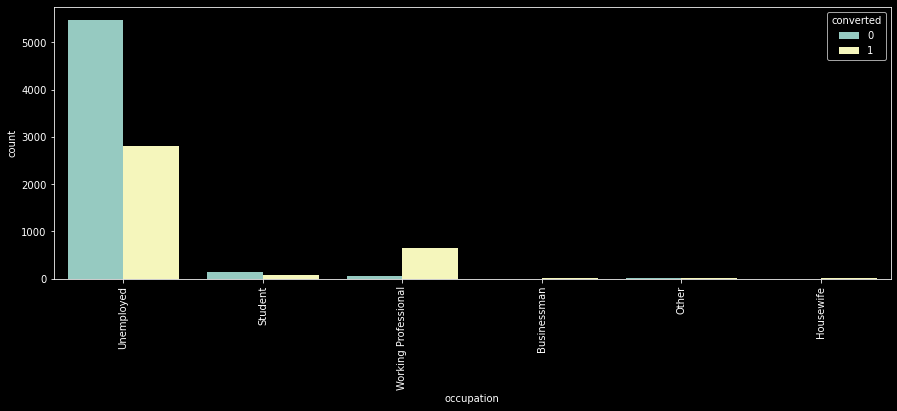

In [24]:
# Visualizing the column after replacement
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
g1 = sns.countplot(df['occupation'], hue = df.converted)
plt.xticks(rotation=90)
plt.show()

- Unemployed leads are the most in terms of absolute numbers
- working professionals have a higher chance to get converted

In [25]:
df.occupation.value_counts(normalize=True,dropna=False)*100

Unemployed             89.72
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

**Specialization column**

In [26]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

**Observation :** we can combine categories and impute them in propotion 
Handling missing values.
- replacing the missing values in Specialization column with 'Not Specified' as lead may not have mentioned specialization because it was not in the list or maybe they are a students and don't have a specialization yet. 
- So we will replace NaN values here with 'Not Specified'

In [27]:
df['specialization'].replace(np.nan,'Not Specified',inplace=True)

In [28]:
df.specialization.value_counts(normalize = True) * 100

Not Specified                       36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

**we can combine the management specialisations as they fall under the same category**

In [29]:
df['specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                 'Operations Management','IT Projects Management','Supply Chain Management',
                                 'Healthcare Management','Hospitality Management','Retail Management'],
                                 'Management', inplace = True)  

In [30]:
df.specialization.value_counts(normalize = True) * 100

Management                          46.03
Not Specified                       36.58
Business Administration              4.36
Banking, Investment And Insurance    3.66
Media and Advertising                2.20
Travel and Tourism                   2.20
International Business               1.93
E-COMMERCE                           1.21
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

**City column**

In [31]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

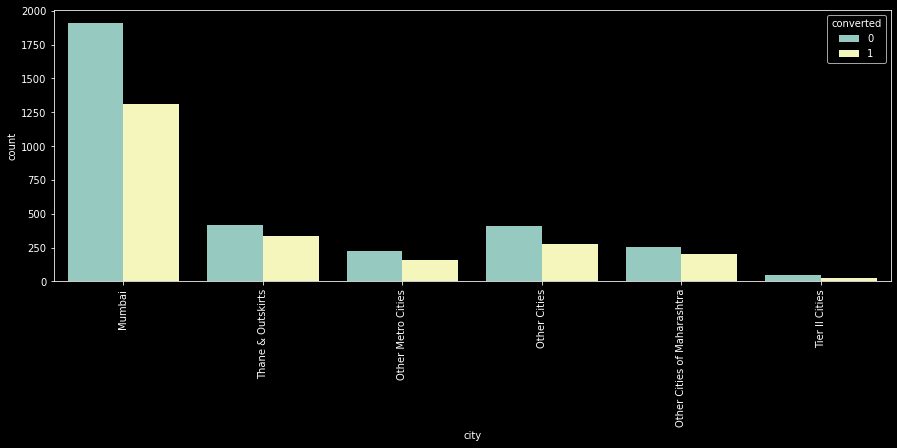

In [32]:
# Visualizing the country column
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1 = sns.countplot(df.city, hue = df.converted)
plt.xticks(rotation=90)
plt.show()

**we can clearly see that Mumbai is the Mode of the Given Column** 
- Replacing the missing values with Mode. 
- As it is a categorical column we use mode

In [33]:
df['city'].replace(np.nan,df['city'].mode()[0],inplace=True)

In [34]:
df['tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [35]:
#replacing Nan values with "Not Specified"

df['tags'] = df['tags'].replace(np.nan,'Not Specified')

#### Handle categorical columns with less missing values and low representation of categories

- Impute missing values.
- Merge categories that have low representation.

In [36]:
df['tags'] = df['tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')

In [37]:
df.isnull().sum()/len(df)*100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
tags                           0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [38]:
# determine all unique values for object datatype columns.
df.select_dtypes(include='object').nunique()

lead_origin                      5
lead_source                     21
do_not_email                     2
do_not_call                      2
specialization                  11
occupation                       6
search                           2
magazine                         1
newspaper_article                2
x_education_forums               2
newspaper                        2
digital_advertisement            2
through_recommendations          2
courses_updates                  1
tags                             8
supply_chain_content_updates     1
dm_content_updates               1
city                             6
cheque_payment                   1
mastering_interview              2
dtype: int64

**Observation :** As we can see that number of unique value is greater than 3 in two columns.
- lead_source
- lead_origin

**Column lead_source**

In [39]:
df.lead_source.value_counts(normalize=True,dropna=False)*100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [40]:
df.lead_source.mode()[0]

'Google'

In [41]:
# we can impute missing values with mode of data. i.e Google.
df.lead_source.fillna('Google',inplace=True)

In [42]:
df['lead_source'] = df['lead_source'].replace('google','Google')
df['lead_source'] = df['lead_source'].replace('Facebook','Social Media')

In [43]:
# There are alot of smaller values which will not be used. so we are safe to group them all.
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [44]:
df.lead_source.value_counts(normalize=True,dropna=False)*100

Google               31.48
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Other Social Sites    3.73
Name: lead_source, dtype: float64

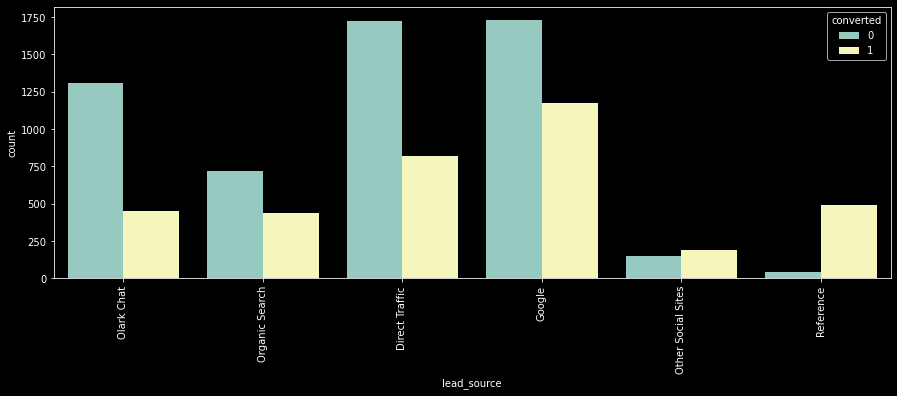

In [45]:
# Visualizing the column after replacement
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1 = sns.countplot(df['lead_source'], hue = df.converted)
plt.xticks(rotation=90)
plt.show()

**Observation**
- Max Number of leads are generated by 'Google' and 'Direct Traffic'
- Conversion rate for referals are higher!
- we have to focus on 'Olark Chat' and other columns to convert to leads
- other social sites do have a higher conversion rate.
- maybe google is lower due to the fact that they first googled the course but got thru by some other means (googling for information)

**column lead_origin**

In [46]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

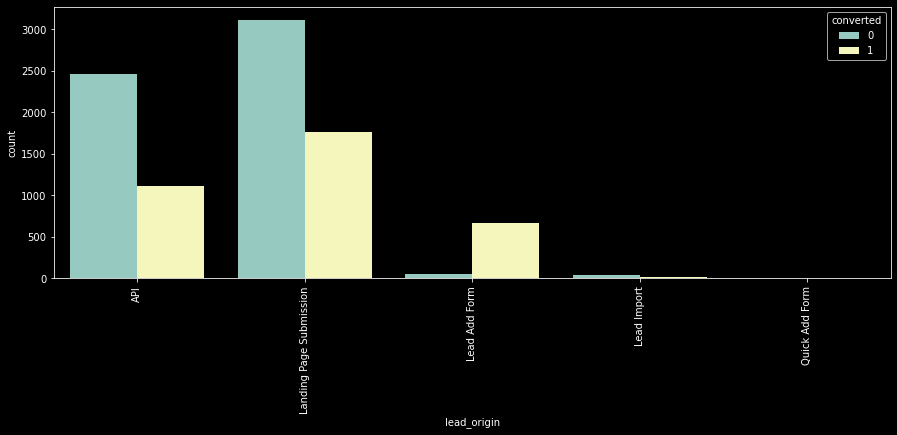

In [47]:
# Visualizing the Lead Origin column
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1 = sns.countplot(df['lead_origin'], hue = df.converted)
plt.xticks(rotation=90)
plt.show()

**Observations**
- API brings alot of people but less conversions
- Landing page Submission are higher in number and more than 50 % conversions
- very few leads from lead import and quick add form
- Lead Add Form has higherconversion rate.
- In order to improve overall lead conversion rate, we have to improve lead conversion of API and landing page submission.


#### Handle Bindary Columns

- Drop those Columns that have data imbalance
- Drop those Columns that have only 1 unique entry

In [48]:
df.select_dtypes(include='object').nunique()

lead_origin                      5
lead_source                      6
do_not_email                     2
do_not_call                      2
specialization                  11
occupation                       6
search                           2
magazine                         1
newspaper_article                2
x_education_forums               2
newspaper                        2
digital_advertisement            2
through_recommendations          2
courses_updates                  1
tags                             8
supply_chain_content_updates     1
dm_content_updates               1
city                             6
cheque_payment                   1
mastering_interview              2
dtype: int64

**Observation** 
- The columns can be droped cause they have only one Unique value.
    - cheque_payment
    - courses_updates
    - supply_chain_content_updates
    - dm_content_updates
    - magazine

In [49]:
df.drop(['cheque_payment','courses_updates','supply_chain_content_updates','dm_content_updates','cheque_payment','magazine'],axis=1,inplace=True)

**Lets check for data imbalance for the rest of the columns**

In [50]:
# select rest of columns with 2 unique values
col=['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']

df_binary=df[col]

for _ in df_binary.columns:
    print(df_binary[_].value_counts(normalize=True)*100)

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64
No    99.98
Yes    0.02
Name: do_not_call, dtype: float64
No    99.85
Yes    0.15
Name: search, dtype: float64
No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64
No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64
No    99.99
Yes    0.01
Name: newspaper, dtype: float64
No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64
No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64
No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64


**Observation**

- The following columns can be droped as well. why, cause they have a heavy imbalance.
    - through_recommendations
    - newspaper
    - x_education_forums
    - digital_advertisement
    - do_not_call
    - search
    - newspaper_article

In [51]:
df.drop(['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations','mastering_interview'],axis=1,inplace=True)

#### Handle Numerical columns

##### Column lead_number
- lead_number is a unique identifier for each lead.<br/>
- Aggretations won't be of any help. so change it to Object.

In [52]:
df.lead_number=df.lead_number.astype('object')

##### Checking for Outliers.
- In Numerical Columns. 
    - total_visits
    - time_on_website
    - page_views_per_visit
- Make a box plot to check Outliers.
- we make box plot to check if we have to impute mean or median.

In [53]:
# STYLESSSSSSS
plt.style.use('bmh')

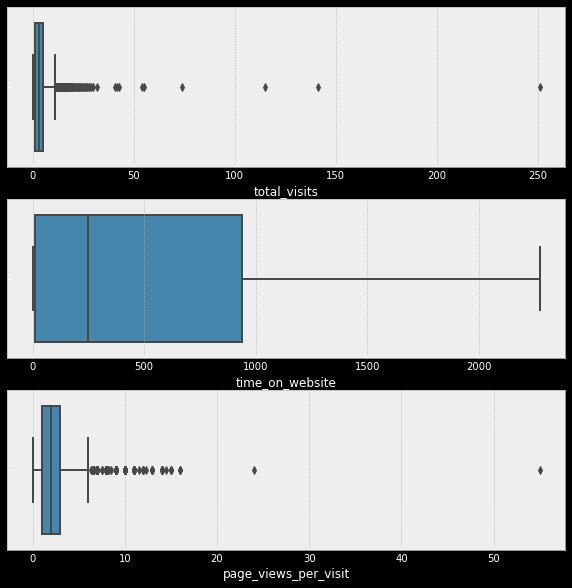

In [54]:
req_columns=['total_visits','time_on_website','page_views_per_visit']

plt.figure(figsize=(10,10))
for _ in enumerate(req_columns):
    plt.subplot(len(req_columns),1,_[0]+1)
    sns.boxplot(df[_[1]].dropna(),orient='h')

**Presence of Outliers in _total_visits_ and _page_views_per_visit_ so we can impute Median Safely**

1. So Handling Missing Data by imputing median
2. A general observation is that column _total_visits_ is a float. Since Total Visits cant be a float.


In [55]:
df.total_visits.fillna(df.total_visits.median(),inplace=True)
df.total_visits = df.total_visits.astype('int')

In [56]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(),inplace=True)

we can drop do not email column as it has not much significance.


In [57]:
df.drop('do_not_email',axis=1,inplace=True)

##### Data Cleaning Results.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   converted             9240 non-null   int64  
 4   total_visits          9240 non-null   int32  
 5   time_on_website       9240 non-null   int64  
 6   page_views_per_visit  9240 non-null   float64
 7   specialization        9240 non-null   object 
 8   occupation            9240 non-null   object 
 9   tags                  9240 non-null   object 
 10  city                  9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 758.1+ KB


### EDA (Exploratory Data Analysis)

#### Numerical Columns

In [59]:
# Plot Stylesssssssssssss
plt.style.use('ggplot')

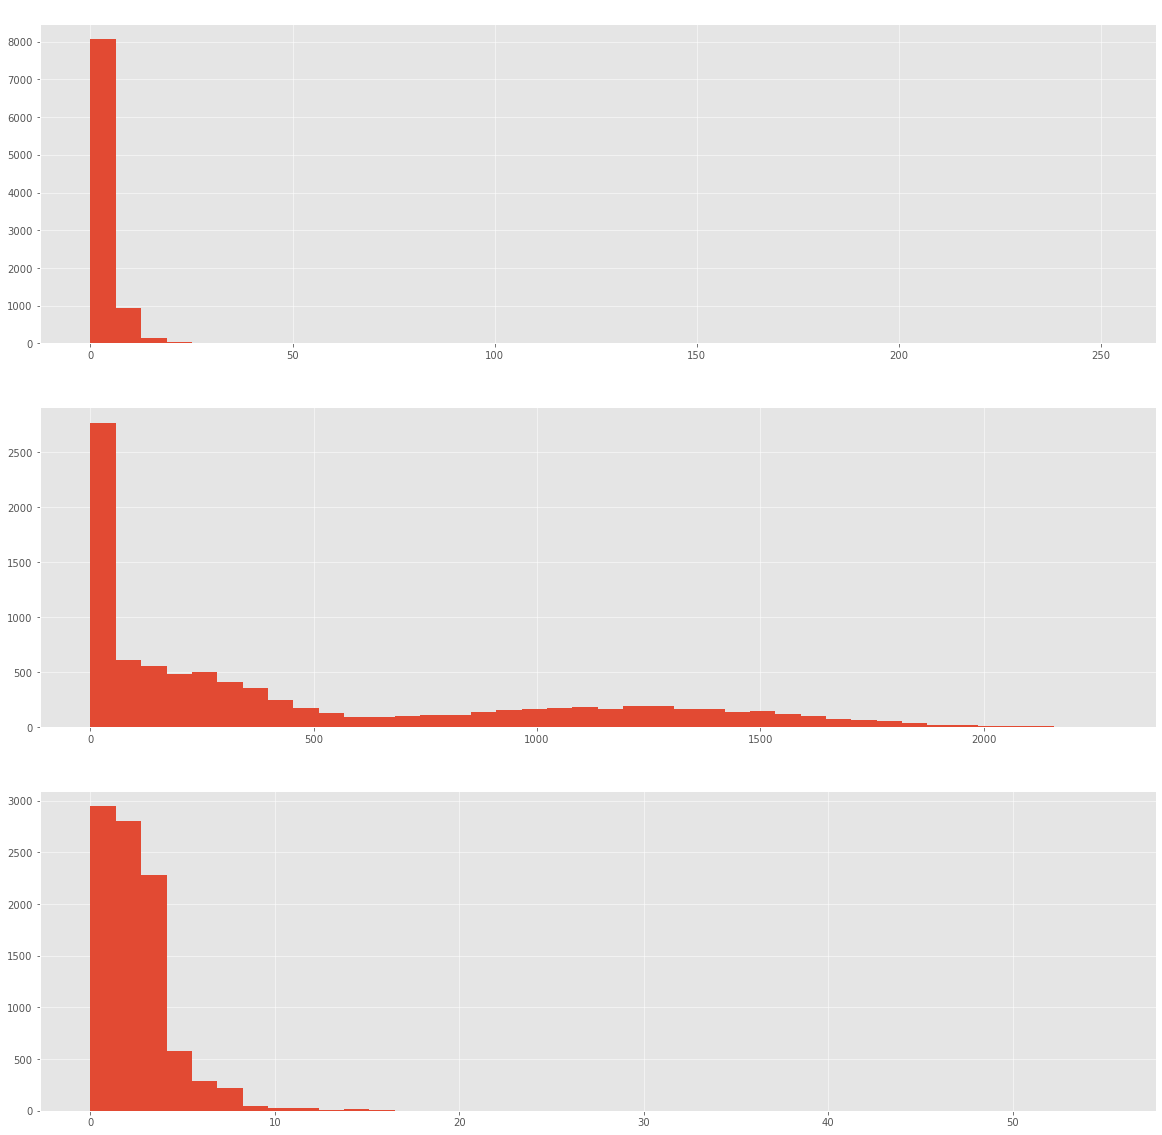

In [60]:
titles=['Total website visits','Total time spent on websites','Average number of page views per visit']
plt.figure(figsize=(20,20))
for _ in enumerate(req_columns):
    plt.subplot(len(req_columns),1,_[0]+1)
    plt.hist(df[_[1]].dropna(),bins=40)
    x=_[0]
    plt.title(titles[x])
    plt.show

**Observations :** 
- High peaks and Right Skewered Data.
- Possibility of Outliers.
- Have Checked them.

#### Heatmap

<AxesSubplot:>

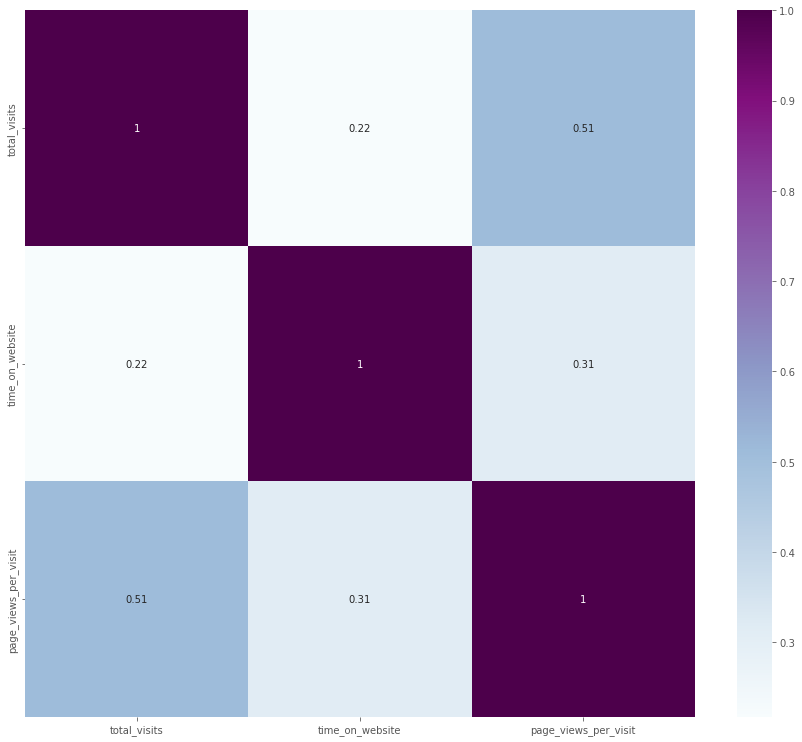

In [61]:
plt.figure(figsize=(15,13))
sns.heatmap(df[req_columns].corr(),cmap='BuPu',annot=True)

##### No corelation in this columns so we don't need to drop them (positive Corelation)

### Categorical Columns

#### Lead Origin

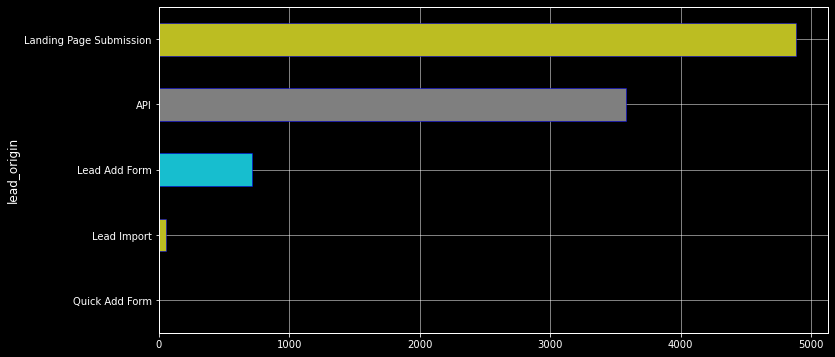

In [62]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
x=df.groupby('lead_origin')
x['lead_number'].count().sort_values().plot(kind='barh',edgecolor='b',color=['#7f7f7f', '#bcbd22', '#17becf'])
plt.show()

#### Lead Source

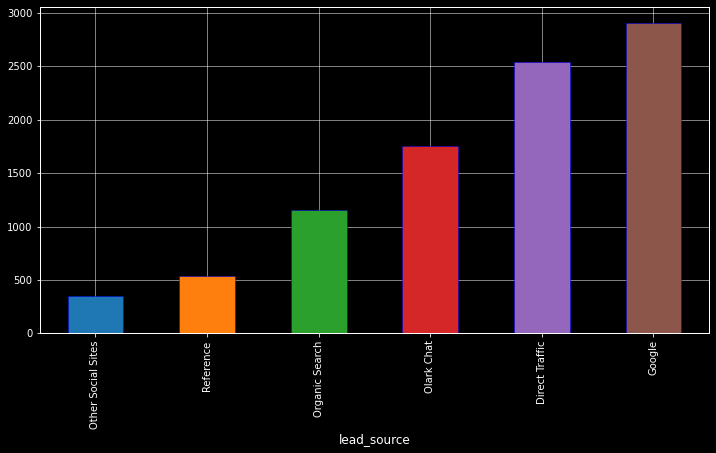

In [63]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
x=df.groupby('lead_source')
x['lead_number'].count().sort_values().plot(kind='bar',edgecolor='b',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b'])
plt.show()

Most people come from 'Google'.

#### Specialization

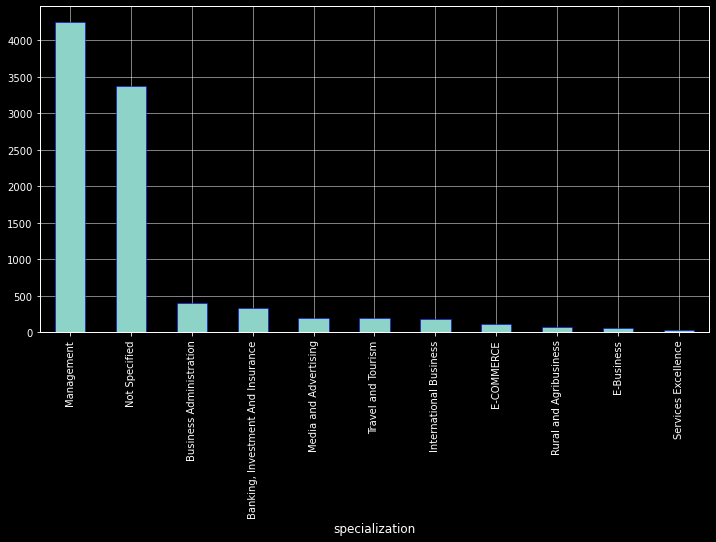

In [64]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
x=df.groupby('specialization')
x['lead_number'].count().sort_values(ascending= False).plot(kind='bar',edgecolor='b')
plt.show()

Most of the Specialization is coming from Management Professionals

#### Occupation

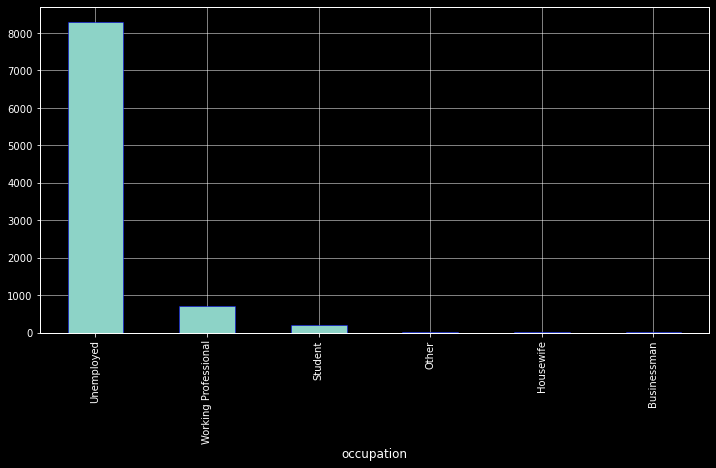

In [65]:
plt.figure(figsize=(12,6))
x=df.groupby('occupation')
x['lead_number'].count().sort_values(ascending= False).plot(kind='bar',edgecolor='b')
plt.show()

Unemployed users are more significant to be a lead.

#### City

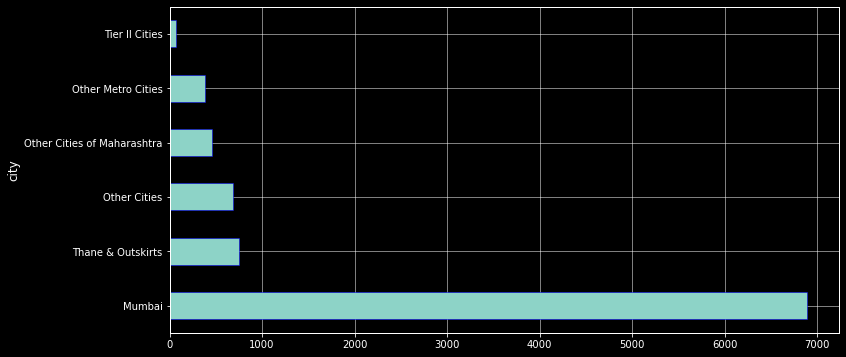

In [66]:
plt.figure(figsize=(12,6))
x=df.groupby('city')
x['lead_number'].count().sort_values(ascending= False).plot(kind='barh',edgecolor='b')
plt.show()

Mumbai and Maharashtra in general dominates the markets.<br/>
This is likely to the fact that courses are based in Mumbai??

### Data Prepration

In [67]:
df.select_dtypes(include='object').nunique()

lead_number       9240
lead_origin          5
lead_source          6
specialization      11
occupation           6
tags                 8
city                 6
dtype: int64

#### Converting Binary Columns

Sucessfully converted Yes/No to 1/0 Using **Label Encoder**

#### Creating Dummy Varaibles for Categorical columns

Categorical Columns are : lead_origin, lead_source, Specialization, occupation, city.

In [68]:
#create dummies
dumdum=pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city','tags']],drop_first=True)

dumdum.head()

#concat results to original data frame

df=pd.concat([df,dumdum],axis=1)

In [69]:
#Droping the columns for which dummies are created.
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city','tags'],axis=1,inplace=True)

In [70]:
df.head()

,lead_number,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_International Business,specialization_Management,specialization_Media and Advertising,specialization_Not Specified,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,660737,0,0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,5,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2,1532,2.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,1,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,1,2,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Handling Outliers.

- First we check the 99% th values.
- Then we can cap the outliers 
- capping means replacing the outliers with .99%tile of the values. 
- This is one of the methods to handle outliers just like imputation.

In [71]:
#checking .99 percentile of the values. for tota_visits
df['total_visits'].describe(percentiles=[.99])

count   9240.00
mean       3.44
std        4.82
min        0.00
50%        3.00
99%       17.00
max      251.00
Name: total_visits, dtype: float64

In [72]:
#checking .99 percentile of the values. for page_views_per_visit
df['page_views_per_visit'].describe(percentiles=[.99])

count   9240.00
mean       2.36
std        2.15
min        0.00
50%        2.00
99%        9.00
max       55.00
Name: page_views_per_visit, dtype: float64

In [73]:
#replacing values outliers.
df.total_visits.loc[df.total_visits>=df.total_visits.quantile(0.99)]=df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit>=df.page_views_per_visit.quantile(0.99)]=df.page_views_per_visit.quantile(0.99)

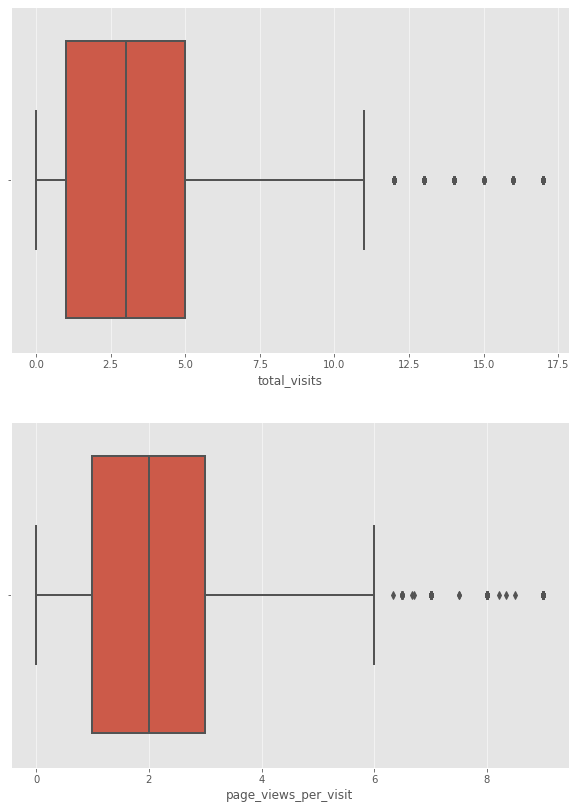

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(10,14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)

plt.show()

Outliers have been reduced by capping/replacing it.

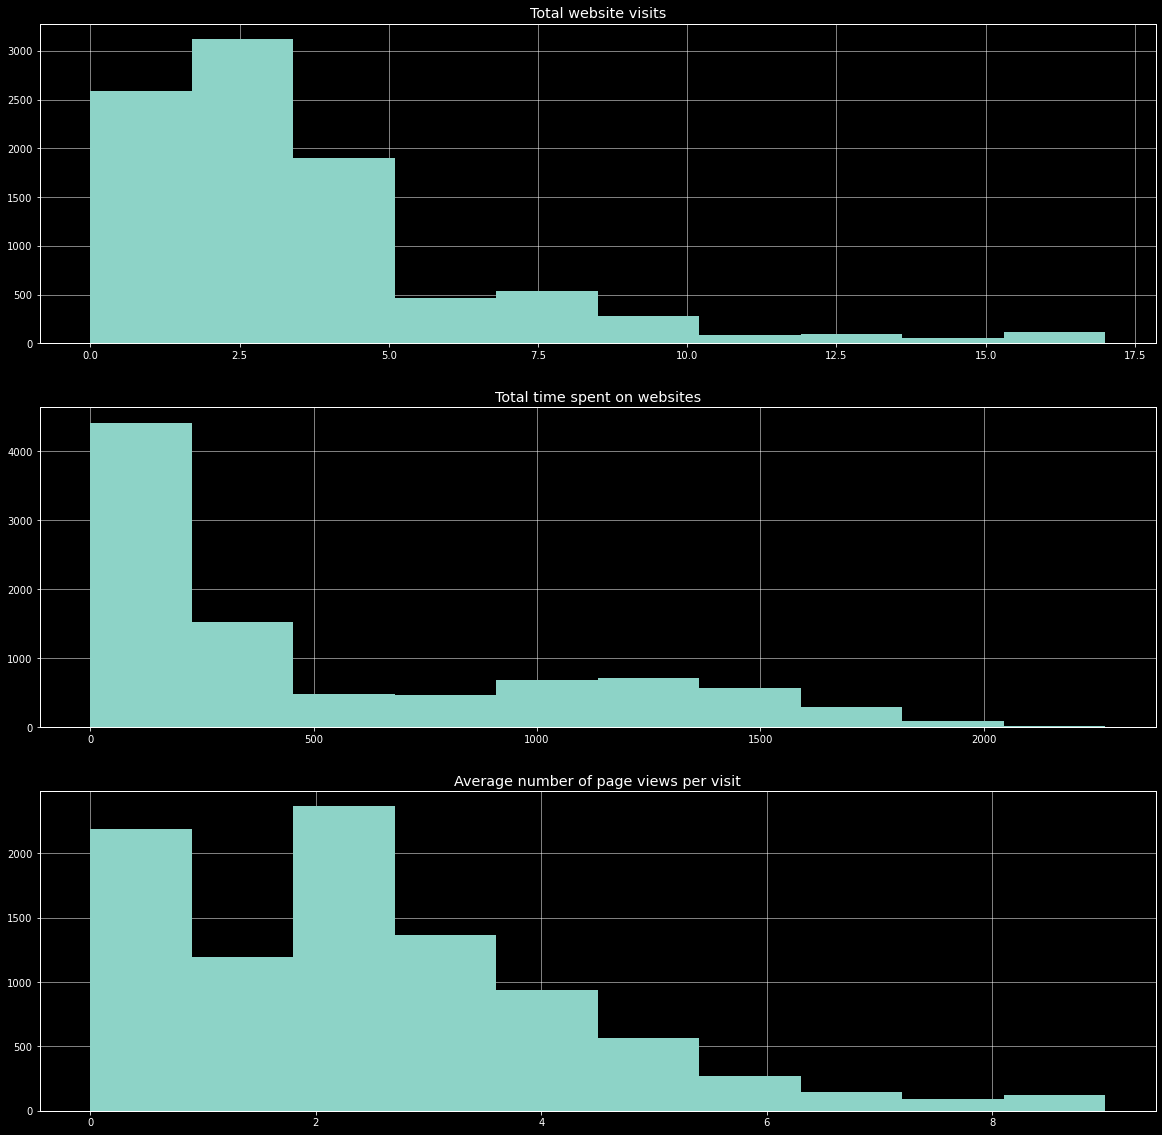

In [75]:
plt.style.use('dark_background')

titles=['Total website visits','Total time spent on websites','Average number of page views per visit']
plt.figure(figsize=(20,20))
for _ in enumerate(req_columns):
    plt.subplot(len(req_columns),1,_[0]+1)
    plt.hist(df[_[1]].dropna(),bins=10)
    x=_[0]
    plt.title(titles[x])
    plt.show

### Test-Train Split

In [76]:
#import test train library
from sklearn.model_selection import train_test_split

In [77]:
# Drop the converted column as we need to have that as dependent varaible.

x=df.drop(['converted','lead_number'],axis=1)

x.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_International Business,specialization_Management,specialization_Media and Advertising,specialization_Not Specified,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,5,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1532,2.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
# Dependent Varaible

y=df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [79]:
#Split the data set into 80% and 20% test train respectively.
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=10)

**Obesrvation from EDA.**
- The Numerical columns are Right skewered.
- The Best way to Scale this kind of distribution is to perform a MinMax Feature scaling.

In [80]:
#import minmax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[['total_visits','time_on_website','page_views_per_visit']]=scaler.fit_transform(x_train[['total_visits','time_on_website','page_views_per_visit']])
x_test[['total_visits','time_on_website','page_views_per_visit']]=scaler.fit_transform(x_test[['total_visits','time_on_website','page_views_per_visit']])


### Model Building

In [81]:
#Importing Necessary Library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### RFE (Recursive feature Elemination)
- There are a few ways to remove features in models.
- Either thru one by one elimination or by using techniques provided by Sklearn.
- RFE removes Features one by one until the optimal number of features is left.
- This is the most important feature selection algorithms due to ease of use and its flexibility.
- The algorithm can wrap around any model, and it produces the best possible set of features that gives the highest performance.
- RFE will give the same accuracy with less number of Features.

In [82]:
# initiate logistic regression
logR = LogisticRegression()

# initiate rfe
rfe = RFE(logR, n_features_to_select=16)             # running RFE with 13 variables as output
rfe = rfe.fit(x_train, y_train)

We fit the estimator into the RFE class.
the rfe.support_ attribute that gives a boolean mask with False values for discarded features.
we can use it to subset our data.

In [83]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True])

**The Columns that RFE selects are down below**

In [84]:
col = x_train.columns[rfe.support_]
print(col)

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Reference', 'specialization_Travel and Tourism',
       'occupation_Working Professional', 'city_Tier II Cities',
       'tags_Closed by Horizzon', 'tags_Interested in other courses',
       'tags_Lost to EINS', 'tags_Not Specified', 'tags_Other_Tags',
       'tags_Ringing', 'tags_Will revert after reading the email'],
      dtype='object')


In [85]:
x_train.columns[~rfe.support_]

Index(['lead_origin_Lead Import', 'lead_origin_Quick Add Form',
       'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Other Social Sites',
       'specialization_Business Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_International Business',
       'specialization_Management', 'specialization_Media and Advertising',
       'specialization_Not Specified', 'specialization_Rural and Agribusiness',
       'specialization_Services Excellence', 'occupation_Housewife',
       'occupation_Other', 'occupation_Student', 'occupation_Unemployed',
       'city_Other Cities', 'city_Other Cities of Maharashtra',
       'city_Other Metro Cities', 'city_Thane & Outskirts'],
      dtype='object')

**The columns that RFE don't select are above**

In [86]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 5),
 ('lead_origin_Quick Add Form', False, 24),
 ('lead_source_Google', False, 10),
 ('lead_source_Olark Chat', False, 2),
 ('lead_source_Organic Search', False, 9),
 ('lead_source_Other Social Sites', False, 4),
 ('lead_source_Reference', True, 1),
 ('specialization_Business Administration', False, 17),
 ('specialization_E-Business', False, 22),
 ('specialization_E-COMMERCE', False, 8),
 ('specialization_International Business', False, 12),
 ('specialization_Management', False, 23),
 ('specialization_Media and Advertising', False, 21),
 ('specialization_Not Specified', False, 16),
 ('specialization_Rural and Agribusiness', False, 11),
 ('specialization_Services Excellence', False, 3),
 ('specialization_Travel and Tourism', True, 1),
 ('occupation_Housewife', False, 

**RFE Ranking the column revelence above**

### **FIRST MODEL** (Made using Feature Selection)

**Model Stats Using statsmodels**

In [87]:
#model 1
x_train_sm = sm.add_constant(x_train[col])

log1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.0
Date:                Mon, 23 Jan 2023   Deviance:                       3160.0
Time:                        23:19:14   Pearson chi2:                 1.36e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5716
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3904      0.214     -1.827      0.068      -0.809       0.028
total_visits                                 0.7106      0.333      2.131      0.033       0.057       1.364
time_on_website                              4.1232      0.210     19.637      0.000       3.712       4.535
page_views_per_visit                        -0.8360      0.338     -2.475      0.013      -1.498      -0.174
lead_origin_Landing Page Submission         -0.6243      0.113     -5.507      0.000      -0.846      -0.402
lead_origin_Lead Add Form                    4.5290      0.484      9.351      0.000       3.580       5.478
lead_source_Reference                       -3.3280      0.625     -5.327      0.000      -4.553      -2.103
specialization_Travel and Tourism           -0.7041      0.370     -1.905      0.057      -1.429       0.020
occupation_Working Professional              0.8371      0.339      2.466      0.014       0.172       1.502
city_Tier II Cities                         -0.6981      0.620     -1.127      0.260      -1.912       0.516
tags_Closed by Horizzon                      3.9828      0.750      5.308      0.000       2.512       5.454
tags_Interested in other courses            -3.9408      0.375    -10.506      0.000      -4.676      -3.206
tags_Lost to EINS                            2.9351      0.554      5.298      0.000       1.849       4.021
tags_Not Specified                          -1.3798      0.205     -6.715      0.000      -1.783      -0.977
tags_Other_Tags                             -3.6972      0.279    -13.266      0.000      -4.243      -3.151
tags_Ringing                                -4.0318      0.306    -13.162      0.000      -4.632      -3.431
tags_Will revert after reading the email     2.9452      0.254     11.605      0.000       2.448       3.443
============================================================================================================
"""

In [89]:
# col=col.drop(['specialization_Services Excellence'])
col=col.drop(['city_Tier II Cities'])

**Droping the Above columns cause they have High P-Value.**

### **SECOND MODEL** (Made using Feature Selection)

In [90]:
#model 2
x_train_sm = sm.add_constant(x_train[col])

logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.7
Date:                Mon, 23 Jan 2023   Deviance:                       3161.4
Time:                        23:19:36   Pearson chi2:                 1.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5715
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3898      0.213     -1.827      0.068      -0.808       0.028
total_visits                                 0.7088      0.333      2.126      0.033       0.055       1.362
time_on_website                              4.1220      0.210     19.631      0.000       3.711       4.534
page_views_per_visit                        -0.8277      0.338     -2.450      0.014      -1.490      -0.166
lead_origin_Landing Page Submission         -0.6338      0.113     -5.605      0.000      -0.855      -0.412
lead_origin_Lead Add Form                    4.5292      0.484      9.351      0.000       3.580       5.479
lead_source_Reference                       -3.3253      0.625     -5.324      0.000      -4.549      -2.101
specialization_Travel and Tourism           -0.7345      0.369     -1.993      0.046      -1.457      -0.012
occupation_Working Professional              0.8328      0.339      2.458      0.014       0.169       1.497
tags_Closed by Horizzon                      3.9854      0.750      5.312      0.000       2.515       5.456
tags_Interested in other courses            -3.9466      0.375    -10.523      0.000      -4.682      -3.212
tags_Lost to EINS                            2.9234      0.553      5.283      0.000       1.839       4.008
tags_Not Specified                          -1.3806      0.205     -6.727      0.000      -1.783      -0.978
tags_Other_Tags                             -3.6979      0.278    -13.278      0.000      -4.244      -3.152
tags_Ringing                                -4.0324      0.306    -13.172      0.000      -4.632      -3.432
tags_Will revert after reading the email     2.9400      0.253     11.602      0.000       2.443       3.437
============================================================================================================
"""

**Model P-values look good. lets check accuracy and other factors**

**Training Predicted Values**

In [91]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train_pred

array([0.14791994, 0.82143796, 0.99918864, ..., 0.14548494, 0.10726831,
       0.51049352])

**Making a DataFrame with columns**
- y_train.values ---> The actual Training values
- y_train_pred ---> The Training predicted probablities
- y_train_pred ---> The Lead Scores (just to check)

In [92]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred,'Lead_score':y_train_pred*100})
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_score
0,0,0.15,14.79
1,1,0.82,82.14
2,1,1.00,99.92
3,1,0.99,99.14
4,0,0.03,3.32


**Adding a column which says Predicted**
- Checking if we keep classification at 50 % probablities.
- Test the accuracy and other parameters.

In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_score,Predicted
0,0,0.15,14.79,0
1,1,0.82,82.14,1
2,1,1.00,99.92,1
3,1,0.99,99.14,1
4,0,0.03,3.32,0


**Checking accuracy Score of the Model**

In [95]:
from sklearn import metrics
accuracy=round(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted),2)

In [96]:
print(accuracy)

0.91


**We have achieved 91 % accuracy**

**Making a Confusion Matrix and Ploting**

<Figure size 1800x1800 with 0 Axes>

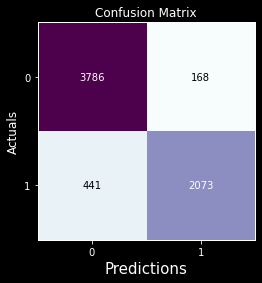

In [97]:
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)

from mlxtend.plotting import plot_confusion_matrix 
plt.figure(figsize=(25,25))
plot_confusion_matrix(conf_mat=confusion,cmap='BuPu')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [98]:
print(confusion)

[[3786  168]
 [ 441 2073]]


**Calculation of Sensitivity and Specificity!**
- Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR).<br/>
    Mathematically, sensitivity or true positive rate can be calculated as the following:<br/>
    **Sensitivity = (True Positive)/(True Positive + False Negative)**
- A high sensitivity means that the model is correctly identifying most of the positive results, while a low sensitivity means that the model is missing a lot of positive results.
- Specificity measures the proportion of true negatives that are correctly identified by the model.
- This proportion could also be called a True Negative Rate (TNR).<br/>
    Mathematically, specificity can be calculated as the following:<br/>
    **Specificity = (True Negative)/(True Negative + False Positive)**

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8245823389021479

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.9575113808801214

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.042488619119878605


In [103]:
# positive predictive value 
print (TP / float(TP+FP))

0.9250334672021419


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8956706884315118


**Making a Column**

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.15,14.79,0,1,1,0,0,0,0,0,0,0,0
1,1,0.82,82.14,1,1,1,1,1,1,1,1,1,1,0
2,1,1.00,99.92,1,1,1,1,1,1,1,1,1,1,1
3,1,0.99,99.14,1,1,1,1,1,1,1,1,1,1,1
4,0,0.03,3.32,0,1,0,0,0,0,0,0,0,0,0


**Binning and creating probablities**

In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.39         1.00         0.00
0.10  0.10      0.73         0.98         0.57
0.20  0.20      0.88         0.90         0.87
0.30  0.30      0.90         0.88         0.92
0.40  0.40      0.91         0.85         0.94
0.50  0.50      0.91         0.82         0.96
0.60  0.60      0.90         0.80         0.97
0.70  0.70      0.90         0.78         0.98
0.80  0.80      0.89         0.76         0.98
0.90  0.90      0.88         0.71         0.99


**Finding Optimal Cut-off Points**<br/>
Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

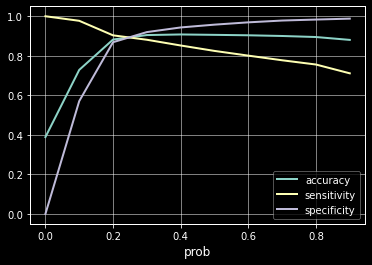

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

**_From the graph, we can see that the optimal point is 0.28_**

**Creating DataFrame for Optimal Probablity 0.28**

In [108]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.15,14.79,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.82,82.14,1,1,1,1,1,1,1,1,1,1,0,1
2,1,1.00,99.92,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.99,99.14,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.03,3.32,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.9025974025974026


In [110]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3613,  341],
       [ 289, 2225]], dtype=int64)

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8850437549721559

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.9137582195245321

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08624178047546788


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9259354177344952


**PREDICTIONS ON X TEST**

In [116]:
x_test = x_test[col]
x_test.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Reference,specialization_Travel and Tourism,occupation_Working Professional,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
567,0.24,0.15,0.44,1,0,0,0,0,0,0,0,0,0,1,0
2303,0.12,0.68,0.22,1,0,0,0,0,0,0,0,0,1,0,0
1523,0.18,0.59,0.33,0,0,0,0,0,0,1,0,0,0,0,0
6923,0.29,0.08,0.56,1,0,0,0,0,0,0,0,1,0,0,0
7841,0.12,0.31,0.22,1,0,0,0,0,0,1,0,0,0,0,0


In [117]:
X_test_sm = sm.add_constant(x_test)

In [118]:
# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

567    0.01
2303   0.12
1523   0.11
6923   0.09
7841   0.02
dtype: float64

In [119]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
567,0.01
2303,0.12
1523,0.11
6923,0.09
7841,0.02


In [120]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [121]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [122]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,converted,0
0,0,0.01
1,0,0.12
2,0,0.11
3,0,0.09
4,0,0.02


In [123]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [124]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head()

,converted,Converted_Prob,Final_Predicted
0,0,0.01,0
1,0,0.12,0
2,0,0.11,0
3,0,0.09,0
4,0,0.02,0


In [125]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.converted, y_pred= y_pred_final.Final_Predicted)

0.9065656565656566

<Figure size 1800x1800 with 0 Axes>

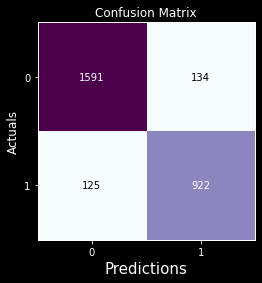

In [126]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.converted, y_pred= y_pred_final.Final_Predicted)
from mlxtend.plotting import plot_confusion_matrix 
plt.figure(figsize=(25,25))
plot_confusion_matrix(conf_mat=confusion2,cmap='BuPu')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [127]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8806112702960841

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9223188405797101

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07768115942028986


In [131]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8731060606060606


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9271561771561772


**Making DataFrame with Lead scores**

In [133]:
leads_score = df
leads_score.head()

,lead_number,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_International Business,specialization_Management,specialization_Media and Advertising,specialization_Not Specified,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,660737,0,0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,5,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2,1532,2.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,1,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,1,2,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [134]:
# Removing all the variables which were not in our final model
leads_score = leads_score[col]
leads_score = sm.add_constant(leads_score)
leads_score.head()

,const,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Reference,specialization_Travel and Tourism,occupation_Working Professional,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,1.00,0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0
1,1.00,5,674,2.50,0,0,0,0,0,0,0,0,0,0,1,0
2,1.00,2,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,1
3,1.00,1,305,1.00,1,0,0,0,0,0,0,0,0,0,1,0
4,1.00,2,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,1


In [135]:
# Making predictions
leads_score_pred = res.predict(leads_score)
leads_score_pred.head()

0   0.01
1   1.00
2   1.00
3   1.00
4   1.00
dtype: float64

In [136]:
leads_score['Lead Score'] = round(leads_score_pred*100)
leads_score.head()

,const,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Reference,specialization_Travel and Tourism,occupation_Working Professional,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email,Lead Score
0,1.00,0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1.00
1,1.00,5,674,2.50,0,0,0,0,0,0,0,0,0,0,1,0,100.00
2,1.00,2,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,1,100.00
3,1.00,1,305,1.00,1,0,0,0,0,0,0,0,0,0,1,0,100.00
4,1.00,2,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,1,100.00


In [137]:
# Adding Lead Number to see which Lead has scored how much
leads_score['Lead Number'] = df.lead_number
leads_score.head()

,const,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Reference,specialization_Travel and Tourism,occupation_Working Professional,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Not Specified,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email,Lead Score,Lead Number
0,1.00,0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1.00,660737
1,1.00,5,674,2.50,0,0,0,0,0,0,0,0,0,0,1,0,100.00,660728
2,1.00,2,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,1,100.00,660727
3,1.00,1,305,1.00,1,0,0,0,0,0,0,0,0,0,1,0,100.00,660719
4,1.00,2,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,1,100.00,660681


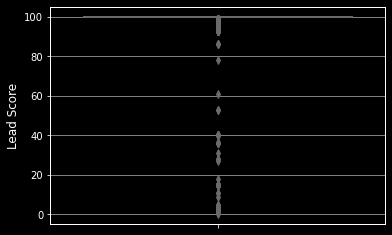

In [138]:
# Plotting Boxplot to check the distribution for the Lead Scores calculated
sns.boxplot(y = leads_score['Lead Score'])
plt.show()